In [1]:
import h5py
import hdf5plugin
import matplotlib.pyplot as plt
import subprocess 
import numpy as np
from ipywidgets import interact, IntSlider

# Data Visualization

This notebook enables the visualization of our dataset. In the next cell, you can either download a .h5 file via gdown or directly specify a path to one of our .h5 files. Please make sure that the packages given in the import statements above are installed. 

In [2]:
DOWNLOAD = True
if DOWNLOAD:
    subprocess.run(['python', '../acousticnn/utils/download.py', '--dataset_name', 'single_example_G5000', '--root_folder', '.'], capture_output=True)
    path = 'G5000_1000_test_lower_res.h5'
else:
    path = 'change/to/path.h5'

## Geometries

The following plot gives an idea how some of the beading patterns in the dataset look

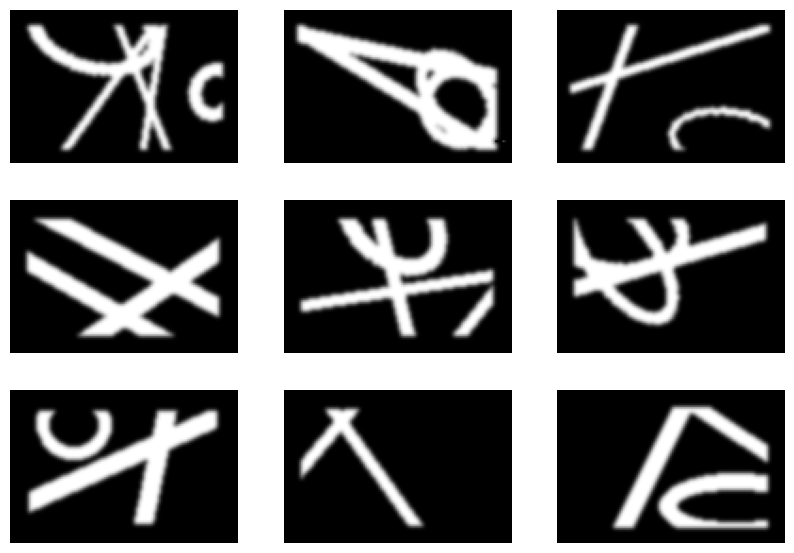

In [3]:
with h5py.File(path, 'r') as f:
    bead_patterns = f["bead_patterns"][:10]
    z_vel_mean_sq = f["z_vel_mean_sq"][:10]
    z_abs_velocity = f["z_abs_velocity"][:10]
    sample_mat = f["sample_mat"][:10]
fig, axs = plt.subplots(3, 3, figsize=(10,7))
for i in range(3):
    for j in range(3):
        axs[i, j].imshow(bead_patterns[i*3+j], cmap='gray')
        axs[i, j].axis('off')

## Vibration Patterns

The following plot is interactive. Rerun the cell to activate the sliders and then move the sliders to look at specific frequencies or instances. Beneath the sliders, the size, thickness and damping loss factor for the specific instance is displayed. For the V5000 dataset, these values are fixed.

In [ ]:
y, x = np.mgrid[0:z_abs_velocity[0,0].shape[0], 0:z_abs_velocity[0,0].shape[1]]

def plot_frequency(frequency=0, idx=0):
    fig, ax = plt.subplots(1, 3, figsize=(20, 5))
    beading_pattern = bead_patterns[idx]
    field_solution = z_abs_velocity[idx, frequency]
    frequency_response = z_vel_mean_sq[idx]
    scalar_parameter = sample_mat[idx]
    vmin, vmax = np.min(field_solution), np.max(field_solution)

    print("Order of parameters: height, width, thickness, damping loss factor ")
    print(scalar_parameter)
    ax[0].imshow(beading_pattern[::-1], cmap='gray')
    ax[0].set_title("Beading pattern")
    ax[0].axis('off')
    ax[1].contourf(x, y, field_solution, levels=40, antialiased=True, vmin=vmin, vmax=vmax, cmap=plt.cm.gray)
    ax[1].imshow(field_solution, cmap='gray')
    ax[1].set_title("Velocity field")
    ax[1].axis('off')
    ax[2].plot(np.arange(300), frequency_response)
    ax[2].set_title("Frequency response")

    # add a vertical line to show the selected frequency
    ax[2].axvline(x=frequency, color='red', linestyle='--', label='Selected Frequency')

    ax[-1].legend()
    plt.tight_layout()
    plt.show()
    return None


frequency_slider = IntSlider(min=0, max=299, step=1, continuous_update=False)
idx_slider = IntSlider(min=0, max=9, step=1, continuous_update=False)

plot = interact(plot_frequency, frequency=frequency_slider, idx=idx_slider)